In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
sys.path.insert(0, os.environ['HOME']+'/Projects/ana_cont_github')
import ana_cont.continuation as cont

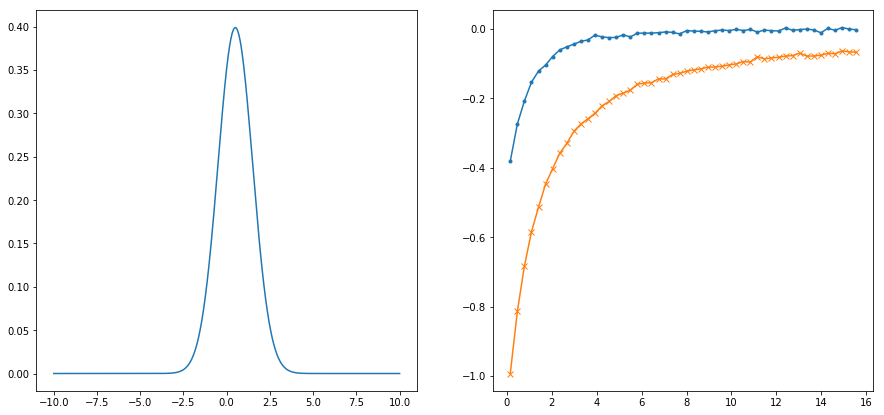

In [10]:
wgrid_full = np.linspace(-10., 10., num=2001, endpoint=True)
spectrum_true = np.exp(-(wgrid_full-0.5)**2/(2.*1.**2))
spectrum_true /= np.trapz(spectrum_true, wgrid_full)
beta = 20.
niw = 50
noise_ampl = 0.005
noise = noise_ampl * (np.random.randn((niw)) + 1j * np.random.randn((niw))) / np.sqrt(2)
iw = np.pi/beta * (2.*np.arange(niw) + 1.)
giw_pure = np.trapz(spectrum_true[None,:]/(1j*iw[:,None] - wgrid_full[None,:]), wgrid_full, axis=1)
giw = giw_pure + noise
fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(15,7))
ax[0].plot(wgrid_full, spectrum_true)
ax[1].plot(iw, giw.real, marker='.')
ax[1].plot(iw, giw.imag, marker='x')
plt.show()

(50,)
301 data points on real axis
100 data points on imaginary axis
36 significant singular values
Precomputation of coefficient matrices...
Solving...
log10(alpha)=6.0000	chi2=9.1537e+04	S=-2.0001e-03	tr=0.1122	conv=2.81e-05,	nfev=5,	norm=1.0302780543970882
log10(alpha)=5.0000	chi2=3.3612e+04	S=-1.4136e-01	tr=1.4016	conv=4.96e-05,	nfev=9,	norm=1.2507106785404027
log10(alpha)=4.0000	chi2=3.0934e+03	S=-5.1280e-01	tr=3.9381	conv=0.000384,	nfev=17,	norm=1.4260798191606892
log10(alpha)=3.0000	chi2=3.5705e+02	S=-8.7085e-01	tr=6.0587	conv=0.00348,	nfev=38,	norm=1.22360068468547
log10(alpha)=2.0000	chi2=6.3039e+01	S=-1.2383e+00	tr=7.8636	conv=0.0318,	nfev=101,	norm=1.0714071139128392
log10(alpha)=1.0000	chi2=4.4817e+01	S=-1.4380e+00	tr=9.5575	conv=0.332,	nfev=276,	norm=1.0230816575786403
log10(alpha)=0.0000	chi2=4.4123e+01	S=-1.5164e+00	tr=11.3334	conv=3.74,	nfev=2348,	norm=1.0141654684816443
prediction for optimal alpha: 3.505541030082061 log10(alphaOpt)= 0.544755054612635
log10(alpha)=0.54

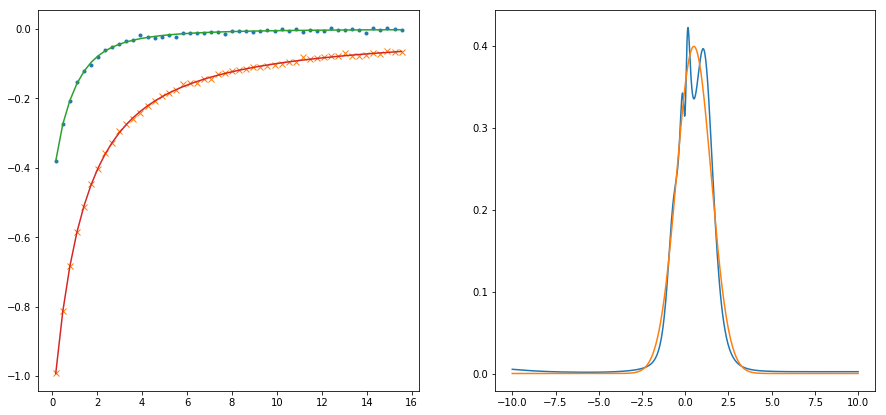

In [11]:
nw = 301
w = 10. * np.tan(np.linspace(-np.pi/2.1, np.pi/2.1, num=nw, endpoint=True)) / np.tan(np.pi/2.1)
# w = np.linspace(-10., 10., num=nw, endpoint=True)
model = np.ones_like(w)
model /= np.trapz(model, w)
probl = cont.AnalyticContinuationProblem(im_axis=iw, re_axis=w, im_data=giw, kernel_mode='freq_fermionic')
sol,_ = probl.solve(method='maxent_svd', stdev=np.ones_like(iw)*noise_ampl*1., alpha_determination='classic', model=model)
fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(15,7))
ax[0].plot(iw, giw.real, marker='.', linestyle='None')
ax[0].plot(iw, giw.imag, marker='x', linestyle='None')
ax[0].plot(iw, sol.backtransform.real)
ax[0].plot(iw, sol.backtransform.imag)
ax[1].plot(w, sol.A_opt)
ax[1].plot(wgrid_full, spectrum_true)
plt.show()

(50,)
301 data points on real axis
100 data points on imaginary axis
32 significant singular values
Precomputation of coefficient matrices...
Solving...
log10(alpha)=6.0000	chi2=9.3486e+04	S=-1.5212e-03	tr=0.0771	conv=2.53e-05,	nfev=4,	norm=1.0301089067208884
log10(alpha)=5.0000	chi2=4.5643e+04	S=-1.2397e-01	tr=0.8952	conv=3.61e-05,	nfev=6,	norm=1.2638938960601156
log10(alpha)=4.0000	chi2=3.0156e+03	S=-6.5668e-01	tr=2.8264	conv=0.000215,	nfev=10,	norm=1.4417777109966576
log10(alpha)=3.0000	chi2=3.6937e+02	S=-9.9052e-01	tr=4.5240	conv=0.00228,	nfev=14,	norm=1.2277867260128164
log10(alpha)=2.0000	chi2=6.2448e+01	S=-1.3691e+00	tr=5.9595	conv=0.0218,	nfev=68,	norm=1.0760176357956004
log10(alpha)=1.0000	chi2=4.5207e+01	S=-1.5602e+00	tr=7.3364	conv=0.235,	nfev=190,	norm=1.0273859578002196
log10(alpha)=0.0000	chi2=4.4320e+01	S=-1.6728e+00	tr=8.7828	conv=2.63,	nfev=1474,	norm=1.018910706307035
prediction for optimal alpha: 2.5119599178022884 log10(alphaOpt)= 0.40001270528165156
log10(alpha)=0.

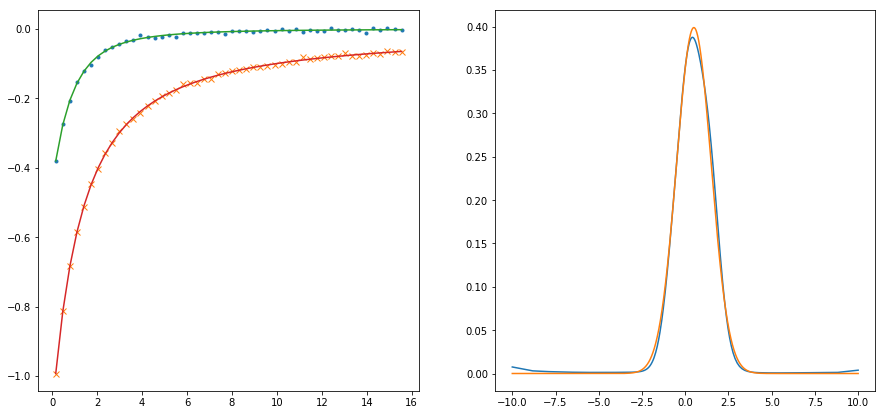

In [16]:
probl = cont.AnalyticContinuationProblem(im_axis=iw, re_axis=w, im_data=giw, kernel_mode='freq_fermionic')
sol,_ = probl.solve(method='maxent_svd', 
                    stdev=np.ones_like(iw)*noise_ampl*1., 
                    alpha_determination='classic', 
                    model=model,
                    preblur=True,
                    blur_width=0.45)
fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(15,7))
ax[0].plot(iw, giw.real, marker='.', linestyle='None')
ax[0].plot(iw, giw.imag, marker='x', linestyle='None')
ax[0].plot(iw, sol.backtransform.real)
ax[0].plot(iw, sol.backtransform.imag)
ax[1].plot(w, sol.A_opt)
ax[1].plot(wgrid_full, spectrum_true)
plt.show()